### Calculate parquet layout

10 pack, 1.8 $m^2$ per pack, 4 piece per pack -> 40 piece

In [1081]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [1082]:
# Input:


firstPiece = 102.25 # cut from first piece
minWidth = 20 # minimum size of piece, if smaller, throw out

In [1083]:
# Room dimensions
@dataclass(frozen=True)
class Room:
    x = 389
    y = 376
    x1 =66
    y1 = 168.5
    y2 = 89.5
    y3 = 118
room = Room()

In [1084]:
# Parquet dimensions

fullWidth = 184.5
fullHeight = 24.5

@dataclass(frozen=True)
class Tile:
    w: float = fullWidth
    h: float = fullHeight
    c: str = None

    def area(self):
        return self.h*self.w

    def isCut(self):
        return self.w<fullWidth;
    def isUncut(self):
        return not self.isCut()


In [1085]:
class Layout:
    numPacks = 10
    tilesInPack = 4
    totalTileNum = numPacks*tilesInPack
    tileColors = ['b', 'g', 'c', 'm', 'y', 'r']
    def __init__(self) -> None:
        self.numTiles: self.totalTileNum
        self.leftPiece: list[Tile] = []
        self.rightPiece: list[Tile] =[]
        self.room = Room()
        self.layout: list[list[Tile]] = []
        self.currRow = -1
        self.cuts = 0
        self.currColor = 0

    def createPatch(self, tile: Tile, x0: float, y0: float):
        kwargs = {}
        if tile.isUncut():
            kwargs['hatch'] = '/'
            kwargs['fill'] = False
        else:
            kwargs['color'] = tile.c
            kwargs['alpha'] = 0.1
            kwargs['fill'] = True
        
        return [[(x0, y0-tile.h), tile.w, tile.h], kwargs]

    def transform(self):
        result = []
        y0 = room.y
        x0 = 0
        for row in self.layout:
            for tile in row:
                result.append(self.createPatch(tile, x0, y0))
                x0 += tile.w
            y0 -= fullHeight
            x0 = 0
        return result
        
    def cutLeft(self, w: float):
        col = self.tileColors[self.currColor]
        self.currColor = (self.currColor+1)%len(self.tileColors)
        remain = Tile(w=fullWidth-w, c=col)
        result = Tile(w=w, c=col)
        self.rightPiece.append(remain)
        self.layout[self.currRow].insert(0, result)
        self.totalTileNum -= 1
        self.cuts += 1

    def cutRight(self, w: float):
        col = self.tileColors[self.currColor]
        self.currColor = (self.currColor+1)%len(self.tileColors)
        remain = Tile(w=fullWidth-w, c = col)
        result = Tile(w=w, c=col)
        self.leftPiece.append(remain)
        self.layout[self.currRow].insert(0, result)
        self.totalTileNum -= 1
        self.cuts += 1

    def newRow(self):
        self.currRow += 1
        self.layout.append([])

    def addTile(self, tile = Tile()):
        self.layout[self.currRow].insert(0, tile)
        if tile.isUncut():
            self.totalTileNum -= 1

    def rowWidth(self, row):
        w = room.x
        if (row+1)*fullHeight > room.y3 and (row)*fullHeight < room.y3 + room.y2:
            w = room.x+room.x1
        return w

    def rowRemain(self):
        #print(f'rowWidth: rownum={self.currRow}, {(self.currRow+1)*fullHeight}, {room.y1}, {room.y1+room.y2}')
        return self.rowWidth(self.currRow) - sum([x.w for x in self.layout[self.currRow]])

layout = Layout()

In [1086]:
tmpTile = Tile()
tmpRoom = Room()
halfRemain = (tmpRoom.x-tmpTile.w)/2.0
print(f'half remaining: {halfRemain}')
print(f'roomArea={(tmpRoom.x*tmpRoom.y+tmpRoom.x1*tmpRoom.y2)/10000}')

packArea = 1.8*10000
numInPack = 4
tileArea = Tile().area()
print(f'tileArea*numInPack={tileArea*numInPack}, packArea/tileArea={packArea/tileArea}')
print(f'5*h={5*tmpTile.h} 7*h={7*tmpTile.h}')

half remaining: 102.25
roomArea=15.2171
tileArea*numInPack=18081.0, packArea/tileArea=3.982080637132902
5*h=122.5 7*h=171.5


In [1087]:
def plotLayout():
    fig, ax = plt.subplots()
    tiling = layout.transform()
    for p in tiling:
        ax.add_patch(patches.Rectangle(*p[0], **p[1]))
        ax.text(p[0][0][0], p[0][0][1], str(p[0][1]))
    plt.plot([0, room.x, room.x, room.x+room.x1, room.x+room.x1, room.x, room.x, 0, 0], [0, 0, room.y1, room.y1, room.y1+room.y2, 
    room.y1+room.y2, room.y1+room.y2+room.y3,room.y1+room.y2+room.y3, 0], 'r')
    plt.show()

leftPieces: [Tile(w=144.5, h=24.5, c='y'), Tile(w=62.25, h=24.5, c='y')]
rightPieces: [Tile(w=12.5, h=24.5, c='c'), Tile(w=54.75, h=24.5, c='y'), Tile(w=58.5, h=24.5, c='c'), Tile(w=124.5, h=24.5, c='m')]
remaining: 2
cuts: 17


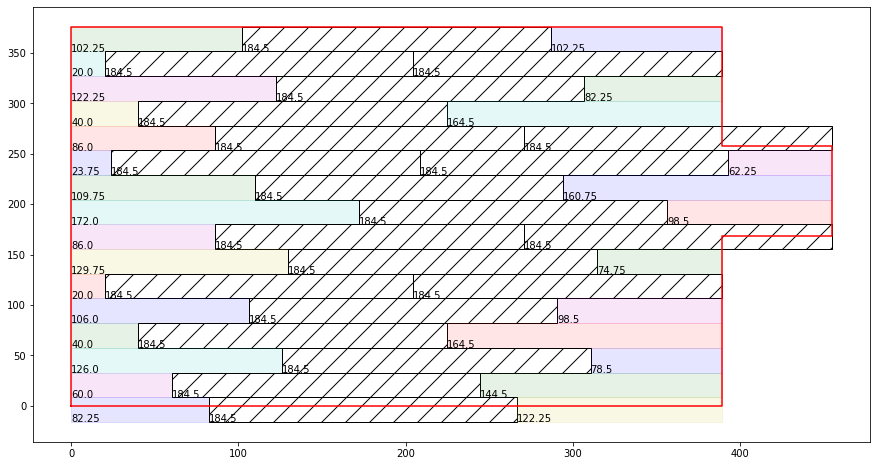

In [1088]:
layout = Layout()

layout.newRow()
layout.cutRight(halfRemain)
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile()
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(0))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(0))
layout.addTile()
layout.cutRight(layout.rowRemain())

layout.newRow()
layout.addTile()
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(0))
layout.addTile()
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(1))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(0))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile()
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(0))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile()
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(1))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(2))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(2))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.addTile(layout.rightPiece.pop(2))
layout.addTile()
layout.cutLeft(layout.rowRemain())

layout.newRow()
layout.cutRight(122.25) # this comes from an existing right piece
layout.addTile()
layout.addTile(layout.leftPiece.pop(0))

print(f'leftPieces: {layout.leftPiece}')
print(f'rightPieces: {layout.rightPiece}')
print(f'remaining: {layout.totalTileNum}')
print(f'cuts: {layout.cuts}')
plotLayout()
